In [ ]:
#Digit recognization: mnist dataset

In [1]:
import keras
import numpy as np
import tensorflow as tf


In [2]:
DESIRED_ACCURACY = 0.99

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') is not None and logs.get('acc')>= DESIRED_ACCURACY):
            print("\nReached desired accuracy so cancelling training!")
            self.model.stop_training = True



In [3]:
callbacks = myCallback()

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(training_images,training_labels),(testing_images,testing_labels) = mnist.load_data()

11493376/11490434 [==============================] - 14s 1us/step


4


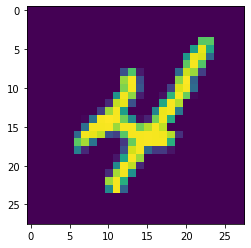

In [25]:
import matplotlib.pyplot as plt
plt.imshow(training_images[9])
print(training_labels[9])

In [6]:
#normalize
training_images = training_images/255.0
testing_images = testing_images/255.0


In [7]:
#model building
model = tf.keras.models.Sequential(\
                    [tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(512, activation = tf.nn.relu),
                    tf.keras.layers.Dense(10,activation = tf.nn.softmax)]
                    )

In [8]:
#compile
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(training_images,training_labels, epochs = 10, callbacks = [callbacks])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0107 - accuracy: 0.9966
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0100 - accuracy: 0.9967
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0093 - accuracy: 0.9969
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0070 - accuracy: 0.9977
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0083 - accuracy: 0.9971
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0052 - accuracy: 0.9984
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0060 - accuracy: 0.9980
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0065 - accuracy: 0.9980
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0064 - accuracy: 0.9978
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.006

In [15]:
model.evaluate(testing_images,testing_labels)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.3389 - acc: 0.8805


[0.33889531096220016, 0.8805]

In [16]:
classifications = model.predict(testing_images)


In [17]:
print(classifications)

[[2.64078842e-10 1.42405640e-12 1.05923065e-11 ... 5.10974322e-03
  1.83162363e-09 9.94878531e-01]
 [9.50192392e-04 7.91382845e-12 9.90484953e-01 ... 4.81510014e-16
  6.08160065e-08 1.69135173e-13]
 [2.28359714e-12 1.00000000e+00 1.25564958e-16 ... 6.20947921e-29
  1.74767309e-14 1.73651565e-21]
 ...
 [1.24753262e-06 1.50319685e-13 5.55670852e-08 ... 8.89050812e-12
  9.99994636e-01 1.81304258e-13]
 [2.67875944e-10 9.99999642e-01 5.63506880e-11 ... 2.41711489e-17
  1.27963540e-09 1.80910843e-15]
 [1.94468748e-06 1.52745021e-11 4.77891490e-07 ... 4.55123140e-03
  7.36390502e-05 6.62649745e-06]]


In [ ]:
#end of notebook